3stars: v6
Chosen n_components: 2
Weights: [0.391 0.609]
Mean:  2.4220551389157627
Means: [3.333 1.837]
Std devs: [0.918 0.545]


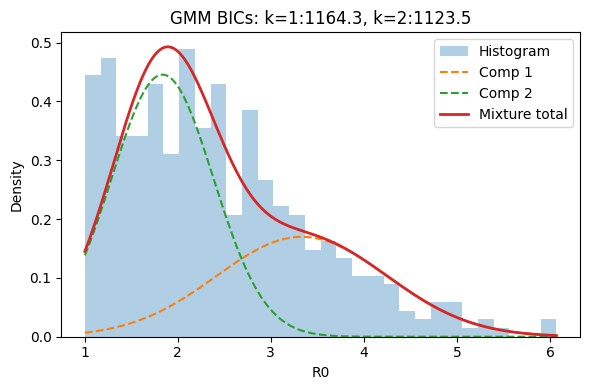

Chosen n_components: 2
Weights: [0.572 0.428]
Mean:  0.47688122294832447
Means: [0.303 0.709]
Std devs: [0.141 0.16 ]


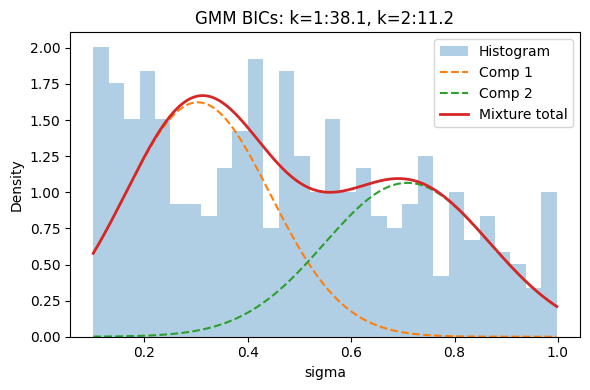

Chosen n_components: 3
Weights: [0.363 0.329 0.308]
Mean:  0.2636219228352546
Means: [0.121 0.415 0.27 ]
Std devs: [0.046 0.05  0.05 ]


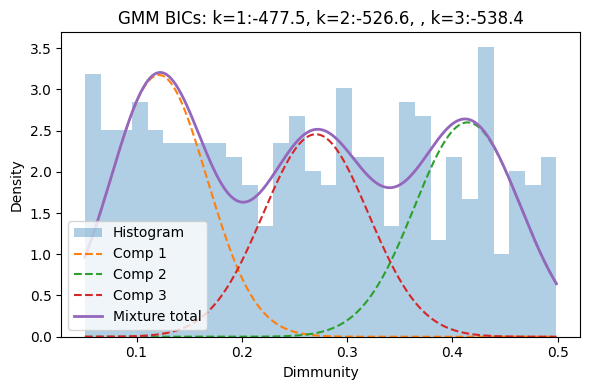

Chosen n_components: 2
Weights: [0.428 0.572]
Mean:  0.6014599826892361
Means: [0.366 0.778]
Std devs: [0.148 0.153]


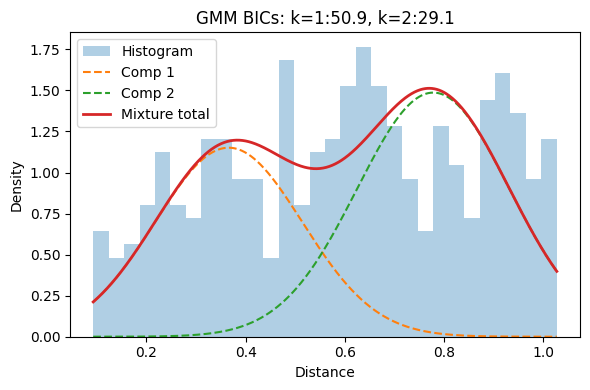

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
R0_samps = np.loadtxt("./experimental_data/R0_samps_3params_3stars_v9_ud3.csv", delimiter=",")


x = np.asarray(R0_samps)

x = x[~np.isnan(x)]
X = x.reshape(-1, 1)

# Try 1 vs 2 components and pick best by BIC
bics, gms = [], []
for k in [1, 2]:
    gm = GaussianMixture(n_components=k, covariance_type="full", random_state=0).fit(X)
    bics.append(gm.bic(X)); gms.append(gm)

print("3stars: v6")
best = gms[int(np.argmin(bics))]
print("Chosen n_components:", best.n_components)
print("Weights:", np.round(best.weights_, 3))
print("Mean: ", np.mean(x))
print("Means:", np.round(best.means_.ravel(), 3))
print("Std devs:", np.round(np.sqrt(best.covariances_.ravel()), 3))

# Plot histogram + total mixture pdf + each component
xs = np.linspace(x.min(), x.max(), 600).reshape(-1, 1)
from scipy.stats import norm
pdf_total = np.zeros_like(xs.ravel())
comp_pdfs = []
for w, m, v in zip(best.weights_, best.means_.ravel(), best.covariances_.ravel()):
    comp_pdf = w * norm.pdf(xs.ravel(), loc=m, scale=np.sqrt(v))
    comp_pdfs.append(comp_pdf)
    pdf_total += comp_pdf

plt.figure(figsize=(6,4))
plt.hist(x, bins=30, density=True, alpha=0.35, label="Histogram")
for i, cp in enumerate(comp_pdfs, 1):
    plt.plot(xs.ravel(), cp, lw=1.5, linestyle="--", label=f"Comp {i}")
plt.plot(xs.ravel(), pdf_total, lw=2, label="Mixture total")
plt.title(f"GMM BICs: k=1:{bics[0]:.1f}, k=2:{bics[1]:.1f}")
plt.xlabel("R0"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()




sigma_samps = np.loadtxt("./experimental_data/sigma_samps_3params_3stars_v9_ud3.csv", delimiter=",")


x = np.asarray(sigma_samps)

x = x[~np.isnan(x)]
X = x.reshape(-1, 1)

# Try 1 vs 2 components and pick best by BIC
bics, gms = [], []
for k in [1, 2]:
    gm = GaussianMixture(n_components=k, covariance_type="full", random_state=0).fit(X)
    bics.append(gm.bic(X)); gms.append(gm)

best = gms[int(np.argmin(bics))]
print("Chosen n_components:", best.n_components)
print("Weights:", np.round(best.weights_, 3))
print("Mean: ", np.mean(x))
print("Means:", np.round(best.means_.ravel(), 3))
print("Std devs:", np.round(np.sqrt(best.covariances_.ravel()), 3))

# Plot histogram + total mixture pdf + each component
xs = np.linspace(x.min(), x.max(), 600).reshape(-1, 1)
from scipy.stats import norm
pdf_total = np.zeros_like(xs.ravel())
comp_pdfs = []
for w, m, v in zip(best.weights_, best.means_.ravel(), best.covariances_.ravel()):
    comp_pdf = w * norm.pdf(xs.ravel(), loc=m, scale=np.sqrt(v))
    comp_pdfs.append(comp_pdf)
    pdf_total += comp_pdf

plt.figure(figsize=(6,4))
plt.hist(x, bins=30, density=True, alpha=0.35, label="Histogram")
for i, cp in enumerate(comp_pdfs, 1):
    plt.plot(xs.ravel(), cp, lw=1.5, linestyle="--", label=f"Comp {i}")
plt.plot(xs.ravel(), pdf_total, lw=2, label="Mixture total")
plt.title(f"GMM BICs: k=1:{bics[0]:.1f}, k=2:{bics[1]:.1f}")
plt.xlabel("sigma"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()


Dimmunity_samps = np.loadtxt("./experimental_data/Dimmunity_samps_3params_3stars_v9_ud3.csv", delimiter=",")


x = np.asarray(Dimmunity_samps)

x = x[~np.isnan(x)]
X = x.reshape(-1, 1)

# Try 1 vs 2 components and pick best by BIC
bics, gms = [], []
for k in [1, 2, 3]:
    gm = GaussianMixture(n_components=k, covariance_type="full", random_state=0).fit(X)
    bics.append(gm.bic(X)); gms.append(gm)

best = gms[int(np.argmin(bics))]
print("Chosen n_components:", best.n_components)
print("Weights:", np.round(best.weights_, 3))
print("Mean: ", np.mean(x))
print("Means:", np.round(best.means_.ravel(), 3))
print("Std devs:", np.round(np.sqrt(best.covariances_.ravel()), 3))

# Plot histogram + total mixture pdf + each component
xs = np.linspace(x.min(), x.max(), 600).reshape(-1, 1)
from scipy.stats import norm
pdf_total = np.zeros_like(xs.ravel())
comp_pdfs = []
for w, m, v in zip(best.weights_, best.means_.ravel(), best.covariances_.ravel()):
    comp_pdf = w * norm.pdf(xs.ravel(), loc=m, scale=np.sqrt(v))
    comp_pdfs.append(comp_pdf)
    pdf_total += comp_pdf

plt.figure(figsize=(6,4))
plt.hist(x, bins=30, density=True, alpha=0.35, label="Histogram")
for i, cp in enumerate(comp_pdfs, 1):
    plt.plot(xs.ravel(), cp, lw=1.5, linestyle="--", label=f"Comp {i}")
plt.plot(xs.ravel(), pdf_total, lw=2, label="Mixture total")
plt.title(f"GMM BICs: k=1:{bics[0]:.1f}, k=2:{bics[1]:.1f}, , k=3:{bics[2]:.1f}")
plt.xlabel("Dimmunity"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()


Dimmunity_samps = np.loadtxt("./experimental_data/dists_acc_3params_3stars_v9_ud3.csv", delimiter=",")


x = np.asarray(Dimmunity_samps)

x = x[~np.isnan(x)]
X = x.reshape(-1, 1)

# Try 1 vs 2 components and pick best by BIC
bics, gms = [], []
for k in [1, 2]:
    gm = GaussianMixture(n_components=k, covariance_type="full", random_state=0).fit(X)
    bics.append(gm.bic(X)); gms.append(gm)

best = gms[int(np.argmin(bics))]
print("Chosen n_components:", best.n_components)
print("Weights:", np.round(best.weights_, 3))
print("Mean: ", np.mean(x))
print("Means:", np.round(best.means_.ravel(), 3))
print("Std devs:", np.round(np.sqrt(best.covariances_.ravel()), 3))

# Plot histogram + total mixture pdf + each component
xs = np.linspace(x.min(), x.max(), 600).reshape(-1, 1)
from scipy.stats import norm
pdf_total = np.zeros_like(xs.ravel())
comp_pdfs = []
for w, m, v in zip(best.weights_, best.means_.ravel(), best.covariances_.ravel()):
    comp_pdf = w * norm.pdf(xs.ravel(), loc=m, scale=np.sqrt(v))
    comp_pdfs.append(comp_pdf)
    pdf_total += comp_pdf

plt.figure(figsize=(6,4))
plt.hist(x, bins=30, density=True, alpha=0.35, label="Histogram")
for i, cp in enumerate(comp_pdfs, 1):
    plt.plot(xs.ravel(), cp, lw=1.5, linestyle="--", label=f"Comp {i}")
plt.plot(xs.ravel(), pdf_total, lw=2, label="Mixture total")
plt.title(f"GMM BICs: k=1:{bics[0]:.1f}, k=2:{bics[1]:.1f}")
plt.xlabel("Distance"); plt.ylabel("Density"); plt.legend(); plt.tight_layout(); plt.show()


Best bandwidth: 0.13203517797162956


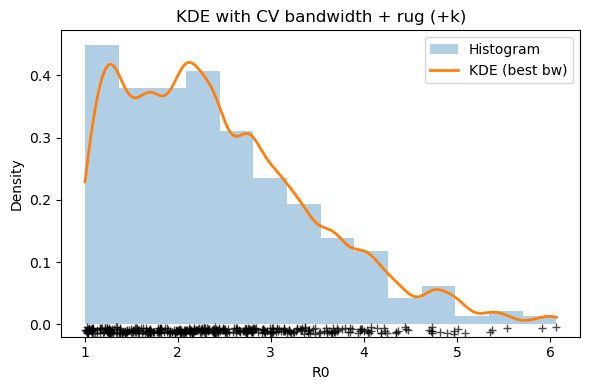

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

# Load
R0_samps = np.loadtxt("./experimental_data/R0_samps_3params_3stars_v9_ud3.csv", delimiter=",")

# Clean
x = np.asarray(R0_samps).ravel()
x = x[np.isfinite(x)]
X = x.reshape(-1, 1)

# Bandwidth search
bandwidths = np.logspace(-2, 0.5, 30)  # ~0.01 to ~3.16

grid = GridSearchCV(
    KernelDensity(kernel="gaussian"),
    {"bandwidth": bandwidths},
    cv=5
)
grid.fit(X)

kde = grid.best_estimator_
print("Best bandwidth:", kde.bandwidth)

# Evaluate on grid
xs = np.linspace(x.min(), x.max(), 600)
xs2 = xs[:, None]  # (N,1) for sklearn
log_dens = kde.score_samples(xs2)
dens = np.exp(log_dens)

# Plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(x, bins="fd", density=True, alpha=0.35, label="Histogram")
ax.plot(xs, dens, lw=2, label="KDE (best bw)")

# --- +k rug plot (points under the curve) ---
rng = np.random.default_rng(0)  # for reproducibility
y_rug = -0.005 - 0.01 * rng.random(X.shape[0])
ax.plot(X[:, 0], y_rug, "+k", markersize=6, alpha=0.7)

# Ensure rug is visible
ax.set_ylim(min(y_rug.min() * 1.2, -0.02), ax.get_ylim()[1])

ax.set_title("KDE with CV bandwidth + rug (+k)")
ax.set_xlabel("R0")
ax.set_ylabel("Density")
ax.legend()
fig.tight_layout()
plt.show()


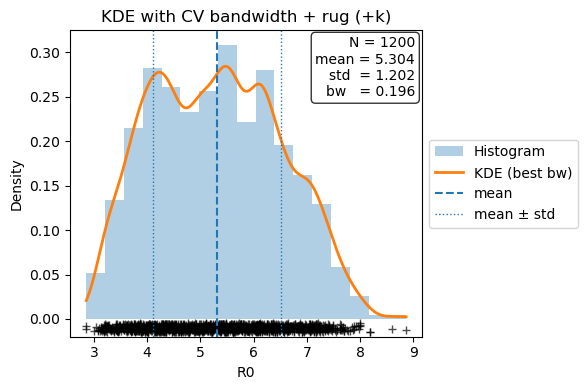

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

# Load
R0_samps = np.loadtxt("./experimental_data/R0_samps_3params_3stars_v9_ud3.csv", delimiter=",")

# Clean
x = np.asarray(R0_samps).ravel()
x = x[np.isfinite(x)]
X = x.reshape(-1, 1)

# Sample stats
mu = np.mean(x)
sigma = np.std(x, ddof=1)

# Bandwidth search
bandwidths = np.logspace(-2, 0.5, 30)

grid = GridSearchCV(
    KernelDensity(kernel="gaussian"),
    {"bandwidth": bandwidths},
    cv=5
)
grid.fit(X)

kde = grid.best_estimator_

# Evaluate on grid
xs = np.linspace(x.min(), x.max(), 600)
xs2 = xs[:, None]
log_dens = kde.score_samples(xs2)
dens = np.exp(log_dens)

# Plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(x, bins="fd", density=True, alpha=0.35, label="Histogram")
ax.plot(xs, dens, lw=2, label="KDE (best bw)")

# +k rug plot
rng = np.random.default_rng(0)
y_rug = -0.005 - 0.01 * rng.random(X.shape[0])
ax.plot(X[:, 0], y_rug, "+k", markersize=6, alpha=0.7)
ax.set_ylim(min(y_rug.min() * 1.2, -0.02), ax.get_ylim()[1])

# ---- Display mean/std in the figure (text box) ----
txt = (
    f"N = {x.size}\n"
    f"mean = {mu:.3f}\n"
    f"std  = {sigma:.3f}\n"
    f"bw   = {kde.bandwidth:.3g}"
)
ax.text(
    0.98, 0.98, txt,
    transform=ax.transAxes,
    ha="right", va="top",
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.8)
)

# ---- Optional: vertical lines for mean and mean±std ----
ax.axvline(mu, lw=1.5, linestyle="--", label="mean")
ax.axvline(mu - sigma, lw=1.0, linestyle=":", label="mean ± std")
ax.axvline(mu + sigma, lw=1.0, linestyle=":")

ax.set_title("KDE with CV bandwidth + rug (+k)")
ax.set_xlabel("R0")
ax.set_ylabel("Density")

ax.legend(loc="center left", bbox_to_anchor=(1.02, 0.5), borderaxespad=0.)
fig.tight_layout()
plt.show()


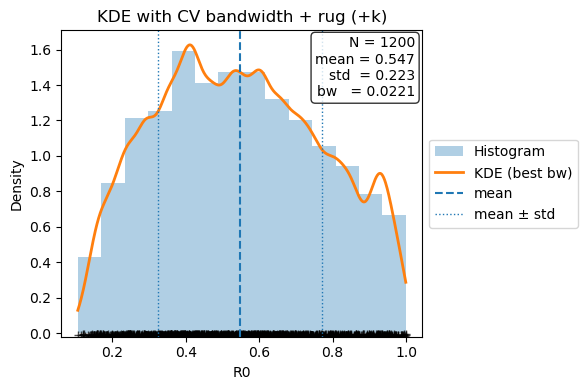

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

# Load
R0_samps = np.loadtxt("./experimental_data/sigma_samps_3params_3stars_v9_ud3.csv", delimiter=",")

# Clean
x = np.asarray(R0_samps).ravel()
x = x[np.isfinite(x)]
X = x.reshape(-1, 1)

# Sample stats
mu = np.mean(x)
sigma = np.std(x, ddof=1)

# Bandwidth search
bandwidths = np.logspace(-2, 0.5, 30)

grid = GridSearchCV(
    KernelDensity(kernel="gaussian"),
    {"bandwidth": bandwidths},
    cv=5
)
grid.fit(X)

kde = grid.best_estimator_

# Evaluate on grid
xs = np.linspace(x.min(), x.max(), 600)
xs2 = xs[:, None]
log_dens = kde.score_samples(xs2)
dens = np.exp(log_dens)

# Plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(x, bins="fd", density=True, alpha=0.35, label="Histogram")
ax.plot(xs, dens, lw=2, label="KDE (best bw)")

# +k rug plot
rng = np.random.default_rng(0)
y_rug = -0.005 - 0.01 * rng.random(X.shape[0])
ax.plot(X[:, 0], y_rug, "+k", markersize=6, alpha=0.7)
ax.set_ylim(min(y_rug.min() * 1.2, -0.02), ax.get_ylim()[1])

# ---- Display mean/std in the figure (text box) ----
txt = (
    f"N = {x.size}\n"
    f"mean = {mu:.3f}\n"
    f"std  = {sigma:.3f}\n"
    f"bw   = {kde.bandwidth:.3g}"
)
ax.text(
    0.98, 0.98, txt,
    transform=ax.transAxes,
    ha="right", va="top",
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.8)
)

# ---- Optional: vertical lines for mean and mean±std ----
ax.axvline(mu, lw=1.5, linestyle="--", label="mean")
ax.axvline(mu - sigma, lw=1.0, linestyle=":", label="mean ± std")
ax.axvline(mu + sigma, lw=1.0, linestyle=":")

ax.set_title("KDE with CV bandwidth + rug (+k)")
ax.set_xlabel("R0")
ax.set_ylabel("Density")

ax.legend(loc="center left", bbox_to_anchor=(1.02, 0.5), borderaxespad=0.)
fig.tight_layout()
plt.show()


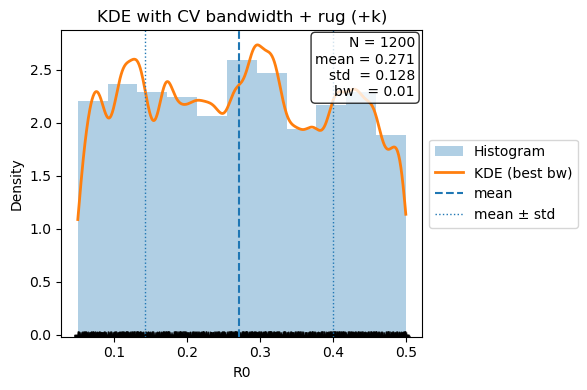

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

# Load
R0_samps = np.loadtxt("./experimental_data/Dimmunity_samps_3params_3stars_v9_ud3.csv", delimiter=",")

# Clean
x = np.asarray(R0_samps).ravel()
x = x[np.isfinite(x)]
X = x.reshape(-1, 1)

# Sample stats
mu = np.mean(x)
sigma = np.std(x, ddof=1)

# Bandwidth search
bandwidths = np.logspace(-2, 0.5, 30)

grid = GridSearchCV(
    KernelDensity(kernel="gaussian"),
    {"bandwidth": bandwidths},
    cv=5
)
grid.fit(X)

kde = grid.best_estimator_

# Evaluate on grid
xs = np.linspace(x.min(), x.max(), 600)
xs2 = xs[:, None]
log_dens = kde.score_samples(xs2)
dens = np.exp(log_dens)

# Plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(x, bins="fd", density=True, alpha=0.35, label="Histogram")
ax.plot(xs, dens, lw=2, label="KDE (best bw)")

# +k rug plot
rng = np.random.default_rng(0)
y_rug = -0.005 - 0.01 * rng.random(X.shape[0])
ax.plot(X[:, 0], y_rug, "+k", markersize=6, alpha=0.7)
ax.set_ylim(min(y_rug.min() * 1.2, -0.02), ax.get_ylim()[1])

# ---- Display mean/std in the figure (text box) ----
txt = (
    f"N = {x.size}\n"
    f"mean = {mu:.3f}\n"
    f"std  = {sigma:.3f}\n"
    f"bw   = {kde.bandwidth:.3g}"
)
ax.text(
    0.98, 0.98, txt,
    transform=ax.transAxes,
    ha="right", va="top",
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.8)
)

# ---- Optional: vertical lines for mean and mean±std ----
ax.axvline(mu, lw=1.5, linestyle="--", label="mean")
ax.axvline(mu - sigma, lw=1.0, linestyle=":", label="mean ± std")
ax.axvline(mu + sigma, lw=1.0, linestyle=":")

ax.set_title("KDE with CV bandwidth + rug (+k)")
ax.set_xlabel("R0")
ax.set_ylabel("Density")

ax.legend(loc="center left", bbox_to_anchor=(1.02, 0.5), borderaxespad=0.)
fig.tight_layout()
plt.show()


In [8]:
import numpy as np

# ---------- load & clean ----------
x = np.loadtxt("./experimental_data/R0_samps_3params_3stars_v9_ud3.csv", delimiter=",")
x = np.asarray(x).ravel()
x = x[np.isfinite(x)]

# ---------- set uniform support [a,b] ----------
# IMPORTANT: use your PRIOR bounds here if you have them!
a = 1.0          # <-- replace with your prior lower bound
b = 12.0          # <-- replace with your prior upper bound

# Optional "correct/true" value to compare the mode against:
x_true = None    # e.g., 2.3

# ---------- basic stats ----------
n = x.size
mu = x.mean()
sd = x.std(ddof=1)

sd_unif = (b - a) / np.sqrt(12)

print(f"N = {n}")
print(f"Sample mean = {mu:.6f}")
print(f"Sample std  = {sd:.6f}")
print(f"Uniform[{a},{b}] std = {sd_unif:.6f}")
print(f"Std ratio (posterior / uniform) = {sd / sd_unif:.3f}")

# ---------- mode estimation ----------
mode_est = None
mode_method = None

try:
    from scipy.stats import gaussian_kde
    kde = gaussian_kde(x)  # Scott bandwidth by default
    xs = np.linspace(a, b, 4000)  # use prior bounds for searching mode
    dens = kde(xs)
    mode_est = xs[np.argmax(dens)]
    mode_method = "KDE mode"
except Exception:
    # fallback: histogram mode (bin-dependent)
    counts, edges = np.histogram(x, bins="fd")
    i = np.argmax(counts)
    mode_est = 0.5 * (edges[i] + edges[i+1])
    mode_method = "Histogram mode (fallback)"

print(f"{mode_method} = {mode_est:.6f}")

if x_true is not None:
    print(f"|mode - true| = {abs(mode_est - x_true):.6f}")

# ---------- uniformity tests (scale to U(0,1)) ----------
# Only meaningful if [a,b] are fixed a priori (e.g., prior bounds)
mask = (x >= a) & (x <= b)
x_in = x[mask]
if x_in.size < x.size:
    print(f"Warning: {x.size - x_in.size} samples outside [{a},{b}] were dropped for uniform tests.")

u = (x_in - a) / (b - a)

from scipy import stats

# KS test against Uniform(0,1)
ks_res = stats.kstest(u, "uniform")  # D statistic + p-value
print(f"KS test vs Uniform(0,1): D={ks_res.statistic:.6f}, p={ks_res.pvalue:.6g}")

# Cramér–von Mises test against Uniform(0,1)
cvm_res = stats.cramervonmises(u, "uniform")
print(f"CvM test vs Uniform(0,1): W2={cvm_res.statistic:.6f}, p={cvm_res.pvalue:.6g}")


N = 1200
Sample mean = 5.303719
Sample std  = 1.202257
Uniform[1.0,12.0] std = 3.175426
Std ratio (posterior / uniform) = 0.379
KDE mode = 5.467117
KS test vs Uniform(0,1): D=0.382198, p=3.88038e-158
CvM test vs Uniform(0,1): W2=53.247957, p=2.64262e-08


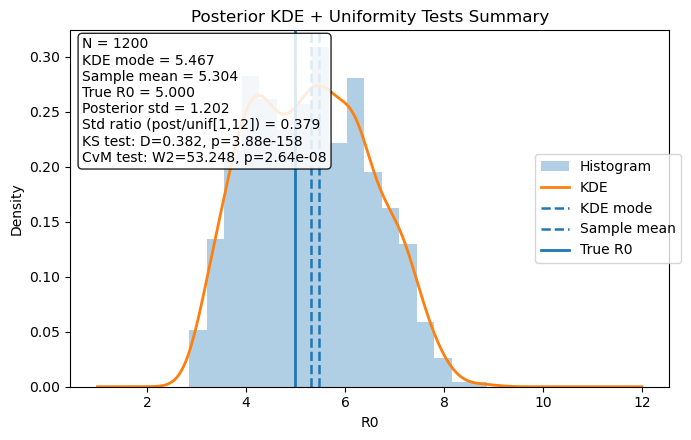

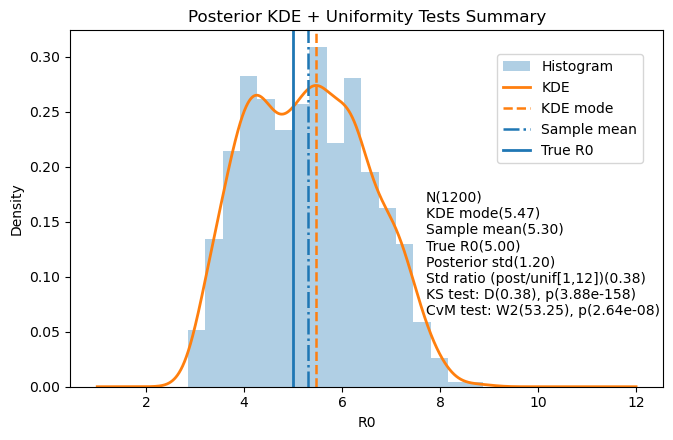

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, kstest, cramervonmises

# ---------- Load ----------
R0_samps = np.loadtxt("./experimental_data/R0_samps_3params_3stars_v9_ud3.csv", delimiter=",")

# ---------- Clean ----------
x = np.asarray(R0_samps).ravel()
x = x[np.isfinite(x)]

# ---------- Settings (your prior bounds + true/reference) ----------
a, b = 1.0, 12.0          # prior bounds for uniform comparison
r0_true = 5.0             # reference/true R0

# ---------- Posterior stats ----------
n = x.size
mu = float(np.mean(x))
sd = float(np.std(x, ddof=1))
sd_unif = (b - a) / np.sqrt(12)
sd_ratio = sd / sd_unif

# ---------- KDE mode (search within [a,b]) ----------
kde = gaussian_kde(x)  # Scott bw
xs = np.linspace(a, b, 4000)
dens = kde(xs)
mode = float(xs[np.argmax(dens)])

# ---------- Uniformity tests vs Uniform[a,b] ----------
# Transform by the uniform CDF -> should be Uniform(0,1) if x ~ Uniform(a,b)
u = (x - a) / (b - a)
u = u[(u >= 0) & (u <= 1)]  # safety; should not drop anything if bounds are correct

ks = kstest(u, "uniform")
cvm = cramervonmises(u, "uniform")

# ---------- Plot ----------
fig, ax = plt.subplots(figsize=(7, 4.5))
ax.hist(x, bins="fd", density=True, alpha=0.35, label="Histogram")
ax.plot(xs, dens, lw=2, label="KDE", color="C1")

# Reference lines
ax.axvline(mode, linestyle="--", lw=1.8, label="KDE mode", color="C1")
ax.axvline(mu, linestyle="-.", lw=1.8, label="Sample mean")
ax.axvline(r0_true, linestyle="-", lw=2.0, label="True R0")

# Text box with required info
txt = (
    f"N({n})\n"
    f"KDE mode({mode:.2f})\n"
    f"Sample mean({mu:.2f})\n"
    f"True R0({r0_true:.2f})\n"
    f"Posterior std({sd:.2f})\n"
    f"Std ratio (post/unif[{a:g},{b:g}])({sd_ratio:.2f})\n"
    f"KS test: D({ks.statistic:.2f}), p({ks.pvalue:.2e})\n"
    f"CvM test: W2({cvm.statistic:.2f}), p({cvm.pvalue:.2e})"
)
# ax.text(
#     0.52, 0.98, txt,
#     transform=ax.transAxes,
#     ha="left", va="top",
#     bbox=dict(boxstyle="None", facecolor="white", alpha=0.85)
# )
ax.text(
    0.60, 0.55, txt,
    transform=ax.transAxes,
    ha="left", va="top",
    fontsize=10,
    bbox=None
)


# Put legend outside to avoid overlap with the text box
ax.legend(loc="center left", bbox_to_anchor=(0.72, 0.78), borderaxespad=0.)

ax.set_title("Posterior KDE + Uniformity Tests Summary")
ax.set_xlabel("R0")
ax.set_ylabel("Density")
fig.tight_layout()
fig.savefig("../figures/posterior_kde_summary_R0_v9.png", dpi=300, bbox_inches="tight")
plt.show()


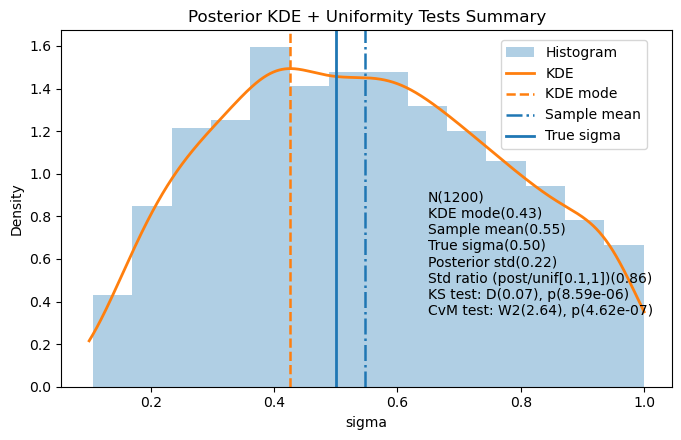

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, kstest, cramervonmises

# ---------- Load ----------
sigma_samps = np.loadtxt("./experimental_data/sigma_samps_3params_3stars_v9_ud3.csv", delimiter=",")

# ---------- Clean ----------
x = np.asarray(sigma_samps).ravel()
x = x[np.isfinite(x)]

# ---------- Settings (your prior bounds + true/reference) ----------
a, b = 0.1, 1.0          # prior bounds for uniform comparison
sigma_true = 0.5             # reference/true sigma

# ---------- Posterior stats ----------
n = x.size
mu = float(np.mean(x))
sd = float(np.std(x, ddof=1))
sd_unif = (b - a) / np.sqrt(12)
sd_ratio = sd / sd_unif

# ---------- KDE mode (search within [a,b]) ----------
kde = gaussian_kde(x)  # Scott bw
xs = np.linspace(a, b, 4000)
dens = kde(xs)
mode = float(xs[np.argmax(dens)])

# ---------- Uniformity tests vs Uniform[a,b] ----------
# Transform by the uniform CDF -> should be Uniform(0,1) if x ~ Uniform(a,b)
u = (x - a) / (b - a)
u = u[(u >= 0) & (u <= 1)]  # safety; should not drop anything if bounds are correct

ks = kstest(u, "uniform")
cvm = cramervonmises(u, "uniform")

# ---------- Plot ----------
fig, ax = plt.subplots(figsize=(7, 4.5))
ax.hist(x, bins="fd", density=True, alpha=0.35, label="Histogram")
ax.plot(xs, dens, lw=2, label="KDE", color="C1")

# Reference lines
ax.axvline(mode, linestyle="--", lw=1.8, label="KDE mode", color="C1")
ax.axvline(mu, linestyle="-.", lw=1.8, label="Sample mean")
ax.axvline(sigma_true, linestyle="-", lw=2.0, label="True sigma")

# Text box with required info
txt = (
    f"N({n})\n"
    f"KDE mode({mode:.2f})\n"
    f"Sample mean({mu:.2f})\n"
    f"True sigma({sigma_true:.2f})\n"
    f"Posterior std({sd:.2f})\n"
    f"Std ratio (post/unif[{a:g},{b:g}])({sd_ratio:.2f})\n"
    f"KS test: D({ks.statistic:.2f}), p({ks.pvalue:.2e})\n"
    f"CvM test: W2({cvm.statistic:.2f}), p({cvm.pvalue:.2e})"
)
# ax.text(
#     0.52, 0.98, txt,
#     transform=ax.transAxes,
#     ha="left", va="top",
#     bbox=dict(boxstyle="None", facecolor="white", alpha=0.85)
# )
ax.text(
    0.60, 0.55, txt,
    transform=ax.transAxes,
    ha="left", va="top",
    fontsize=10,
    bbox=None
)


# Put legend outside to avoid overlap with the text box
ax.legend(loc="center left", bbox_to_anchor=(0.72, 0.82), borderaxespad=0.)

ax.set_title("Posterior KDE + Uniformity Tests Summary")
ax.set_xlabel("sigma")
ax.set_ylabel("Density")
fig.tight_layout()
fig.savefig("../figures/posterior_kde_summary_sigma_v9.png", dpi=300, bbox_inches="tight")
plt.show()


In [50]:
import numpy as np

# ---------- load & clean ----------
x = np.loadtxt("./experimental_data/sigma_samps_3params_3stars_v9_ud3.csv", delimiter=",")
x = np.asarray(x).ravel()
x = x[np.isfinite(x)]

# ---------- set uniform support [a,b] ----------
# IMPORTANT: use your PRIOR bounds here if you have them!
a = 0.1         # <-- replace with your prior lower bound
b = 1.0          # <-- replace with your prior upper bound

# Optional "correct/true" value to compare the mode against:
x_true = 0.5    # e.g., 2.3

# ---------- basic stats ----------
n = x.size
mu = x.mean()
sd = x.std(ddof=1)

sd_unif = (b - a) / np.sqrt(12)

print(f"N = {n}")
print(f"Sample mean = {mu:.6f}")
print(f"Sample std  = {sd:.6f}")
print(f"Uniform[{a},{b}] std = {sd_unif:.6f}")
print(f"Std ratio (posterior / uniform) = {sd / sd_unif:.3f}")

# ---------- mode estimation ----------
mode_est = None
mode_method = None

try:
    from scipy.stats import gaussian_kde
    kde = gaussian_kde(x)  # Scott bandwidth by default
    xs = np.linspace(a, b, 4000)  # use prior bounds for searching mode
    dens = kde(xs)
    mode_est = xs[np.argmax(dens)]
    mode_method = "KDE mode"
except Exception:
    # fallback: histogram mode (bin-dependent)
    counts, edges = np.histogram(x, bins="fd")
    i = np.argmax(counts)
    mode_est = 0.5 * (edges[i] + edges[i+1])
    mode_method = "Histogram mode (fallback)"

print(f"{mode_method} = {mode_est:.6f}")

if x_true is not None:
    print(f"|mode - true| = {abs(mode_est - x_true):.6f}")

# ---------- uniformity tests (scale to U(0,1)) ----------
# Only meaningful if [a,b] are fixed a priori (e.g., prior bounds)
mask = (x >= a) & (x <= b)
x_in = x[mask]
if x_in.size < x.size:
    print(f"Warning: {x.size - x_in.size} samples outside [{a},{b}] were dropped for uniform tests.")

u = (x_in - a) / (b - a)

from scipy import stats

# KS test against Uniform(0,1)
ks_res = stats.kstest(u, "uniform")  # D statistic + p-value
print(f"KS test vs Uniform(0,1): D={ks_res.statistic:.6f}, p={ks_res.pvalue:.6g}")

# Cramér–von Mises test against Uniform(0,1)
cvm_res = stats.cramervonmises(u, "uniform")
print(f"CvM test vs Uniform(0,1): W2={cvm_res.statistic:.6f}, p={cvm_res.pvalue:.6g}")


N = 1200
Sample mean = 0.546992
Sample std  = 0.222966
Uniform[0.1,1.0] std = 0.259808
Std ratio (posterior / uniform) = 0.858
KDE mode = 0.426332
|mode - true| = 0.073668
KS test vs Uniform(0,1): D=0.071586, p=8.58651e-06
CvM test vs Uniform(0,1): W2=2.641419, p=4.6186e-07


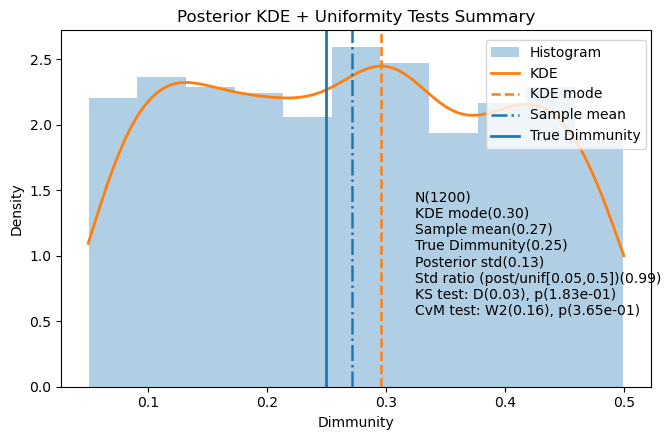

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, kstest, cramervonmises

# ---------- Load ----------
Dimmunity_samps = np.loadtxt("./experimental_data/Dimmunity_samps_3params_3stars_v9_ud3.csv", delimiter=",")

# ---------- Clean ----------
x = np.asarray(Dimmunity_samps).ravel()
x = x[np.isfinite(x)]

# ---------- Settings (your prior bounds + true/reference) ----------
a, b = 0.05, 0.5          # prior bounds for uniform comparison
Dimmunity_true = 0.25             # reference/true sigma

# ---------- Posterior stats ----------
n = x.size
mu = float(np.mean(x))
sd = float(np.std(x, ddof=1))
sd_unif = (b - a) / np.sqrt(12)
sd_ratio = sd / sd_unif

# ---------- KDE mode (search within [a,b]) ----------
kde = gaussian_kde(x)  # Scott bw
xs = np.linspace(a, b, 4000)
dens = kde(xs)
mode = float(xs[np.argmax(dens)])

# ---------- Uniformity tests vs Uniform[a,b] ----------
# Transform by the uniform CDF -> should be Uniform(0,1) if x ~ Uniform(a,b)
u = (x - a) / (b - a)
u = u[(u >= 0) & (u <= 1)]  # safety; should not drop anything if bounds are correct

ks = kstest(u, "uniform")
cvm = cramervonmises(u, "uniform")

# ---------- Plot ----------
fig, ax = plt.subplots(figsize=(7, 4.5))
ax.hist(x, bins="fd", density=True, alpha=0.35, label="Histogram")
ax.plot(xs, dens, lw=2, label="KDE", color="C1")

# Reference lines
ax.axvline(mode, linestyle="--", lw=1.8, label="KDE mode", color="C1")
ax.axvline(mu, linestyle="-.", lw=1.8, label="Sample mean")
ax.axvline(Dimmunity_true, linestyle="-", lw=2.0, label="True Dimmunity")

# Text box with required info
txt = (
    f"N({n})\n"
    f"KDE mode({mode:.2f})\n"
    f"Sample mean({mu:.2f})\n"
    f"True Dimmunity({Dimmunity_true:.2f})\n"
    f"Posterior std({sd:.2f})\n"
    f"Std ratio (post/unif[{a:g},{b:g}])({sd_ratio:.2f})\n"
    f"KS test: D({ks.statistic:.2f}), p({ks.pvalue:.2e})\n"
    f"CvM test: W2({cvm.statistic:.2f}), p({cvm.pvalue:.2e})"
)
# ax.text(
#     0.52, 0.98, txt,
#     transform=ax.transAxes,
#     ha="left", va="top",
#     bbox=dict(boxstyle="None", facecolor="white", alpha=0.85)
# )
ax.text(
    0.60, 0.55, txt,
    transform=ax.transAxes,
    ha="left", va="top",
    fontsize=10,
    bbox=None
)


# Put legend outside to avoid overlap with the text box
ax.legend(loc="center left", bbox_to_anchor=(0.72, 0.82), borderaxespad=0.)

ax.set_title("Posterior KDE + Uniformity Tests Summary")
ax.set_xlabel("Dimmunity")
ax.set_ylabel("Density")
fig.tight_layout()
fig.savefig("../figures/posterior_kde_summary_Dimmunity_v9.png", dpi=300, bbox_inches="tight")
plt.show()


In [49]:
import numpy as np

# ---------- load & clean ----------
x = np.loadtxt("./experimental_data/Dimmunity_samps_3params_3stars_v9_ud3.csv", delimiter=",")
x = np.asarray(x).ravel()
x = x[np.isfinite(x)]

# ---------- set uniform support [a,b] ----------
# IMPORTANT: use your PRIOR bounds here if you have them!
a = 0.05         # <-- replace with your prior lower bound
b = 0.5          # <-- replace with your prior upper bound

# Optional "correct/true" value to compare the mode against:
x_true = 0.25    # e.g., 2.3

# ---------- basic stats ----------
n = x.size
mu = x.mean()
sd = x.std(ddof=1)

sd_unif = (b - a) / np.sqrt(12)

print(f"N = {n}")
print(f"Sample mean = {mu:.6f}")
print(f"Sample std  = {sd:.6f}")
print(f"Uniform[{a},{b}] std = {sd_unif:.6f}")
print(f"Std ratio (posterior / uniform) = {sd / sd_unif:.3f}")

# ---------- mode estimation ----------
mode_est = None
mode_method = None

try:
    from scipy.stats import gaussian_kde
    kde = gaussian_kde(x)  # Scott bandwidth by default
    xs = np.linspace(a, b, 4000)  # use prior bounds for searching mode
    dens = kde(xs)
    mode_est = xs[np.argmax(dens)]
    mode_method = "KDE mode"
except Exception:
    # fallback: histogram mode (bin-dependent)
    counts, edges = np.histogram(x, bins="fd")
    i = np.argmax(counts)
    mode_est = 0.5 * (edges[i] + edges[i+1])
    mode_method = "Histogram mode (fallback)"

print(f"{mode_method} = {mode_est:.6f}")

if x_true is not None:
    print(f"|mode - true| = {abs(mode_est - x_true):.6f}")

# ---------- uniformity tests (scale to U(0,1)) ----------
# Only meaningful if [a,b] are fixed a priori (e.g., prior bounds)
mask = (x >= a) & (x <= b)
x_in = x[mask]
if x_in.size < x.size:
    print(f"Warning: {x.size - x_in.size} samples outside [{a},{b}] were dropped for uniform tests.")

u = (x_in - a) / (b - a)

from scipy import stats

# KS test against Uniform(0,1)
ks_res = stats.kstest(u, "uniform")  # D statistic + p-value
print(f"KS test vs Uniform(0,1): D={ks_res.statistic:.6f}, p={ks_res.pvalue:.6g}")

# Cramér–von Mises test against Uniform(0,1)
cvm_res = stats.cramervonmises(u, "uniform")
print(f"CvM test vs Uniform(0,1): W2={cvm_res.statistic:.6f}, p={cvm_res.pvalue:.6g}")


N = 1200
Sample mean = 0.271235
Sample std  = 0.128213
Uniform[0.05,0.5] std = 0.129904
Std ratio (posterior / uniform) = 0.987
KDE mode = 0.296212
|mode - true| = 0.046212
KS test vs Uniform(0,1): D=0.031412, p=0.183272
CvM test vs Uniform(0,1): W2=0.158438, p=0.364895
